In [1]:
import pandas as pd

In [2]:
#excel_file_path1 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2018_trackman.xlsx'
#excel_file_path2 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2019_trackman.xlsx'
excel_file_path3 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/象騎士(8.18).xlsx'
excel_file_path4 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2021_trackman.xlsx'
excel_file_path5 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2022_trackman.xlsx'
excel_file_path6 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2023_trackman1.xlsx'
excel_file_path7 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2023_trackman2.xlsx'
excel_file_path8 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/2024_trackman.xlsx'
sheet_name = 'Sheet1'

In [3]:
#track_2018 = pd.read_excel(excel_file_path1, sheet_name=sheet_name)
#track_2019 = pd.read_excel(excel_file_path2, sheet_name=sheet_name)
track_Sanchez = pd.read_excel(excel_file_path3, sheet_name=sheet_name)

track_2021 = pd.read_excel(excel_file_path4, sheet_name=sheet_name)
track_2022 = pd.read_excel(excel_file_path5, sheet_name=sheet_name)
track_2023_1 = pd.read_excel(excel_file_path6, sheet_name=sheet_name)
track_2023_2 = pd.read_excel(excel_file_path7, sheet_name=sheet_name)
track_2024 = pd.read_excel(excel_file_path8, sheet_name=sheet_name)

In [4]:
col = ['GameID','Pitcher','PitcherThrows','PitchCall','OutsOnPlay','RunsScored','TaggedPitchType','RelSpeed','VertRelAngle','HorzRelAngle','SpinRate','RelHeight','RelSide','Extension','VertBreak','InducedVertBreak','HorzBreak','VertApprAngle','HorzApprAngle','ZoneSpeed','PlayResult','PitchCall','KorBB','ExitSpeed','Angle']

In [5]:
#track_2018= track_2018[col]
#track_2019= track_2019[col]
track_Sanchez = track_Sanchez[col]

track_2021= track_2021[col]
track_2022= track_2022[col]
track_2023_1= track_2023_1[col]
track_2023_2= track_2023_2[col]
track_2024= track_2024[col]

In [6]:
#data1 = pd.concat([track_2019, track_2018], ignore_index=True)
data2 = pd.concat([track_Sanchez, track_2021], ignore_index=True)
data3 = pd.concat([track_2022, data2], ignore_index=True)
data4 = pd.concat([data3, track_2023_1], ignore_index=True)
data5 = pd.concat([data4, track_2023_2], ignore_index=True)
data = pd.concat([data5, track_2024], ignore_index=True)

In [7]:
data['Year'] = data['GameID'].str[:4]

In [8]:
year_items = data['Year'].unique()
year_items

array(['2022', '2024', '2021', '2023', nan], dtype=object)

In [9]:
data = data[~data['TaggedPitchType'].isin(['Undefined', 'Other'])]

In [10]:
#data = data.loc[:, ~data.columns.duplicated()]
#pitch_type_items = data['PitchCall'].unique()
#pitch_type_items

In [11]:
name_mapping = {
    'Fastball':'直球', 
    'ChangeUp':'變速球', 
    'Cutter':'卡特球', 
    'Curveball':'曲球', 
    'Splitter':'指叉球',
    'Slider':'滑球', 
    'Sinker':'伸卡球',
    'KnuckleBall':'彈指曲球', 
    'TwoSeamFastBall':'伸卡球', 
    'FourSeamFastBall':'直球', 
    'OneSeamFastBall':'伸卡球',
    'Changeup':'變速球', 
    'Knuckleball':'彈指曲球'  
}

# 新增一列"球員"，根据"Pitcher"列的值匹配中文名
data['球種'] = data['TaggedPitchType'].map(name_mapping)

In [12]:
pitch_type_items = data['球種'].unique()
pitch_type_items

array(['直球', '卡特球', '指叉球', '變速球', '滑球', '伸卡球', '曲球', '彈指曲球', nan],
      dtype=object)

In [13]:
data['SpeedDrop']=data['RelSpeed']-data['ZoneSpeed']

In [14]:
data

,GameID,Pitcher,PitcherThrows,PitchCall,OutsOnPlay,RunsScored,TaggedPitchType,RelSpeed,VertRelAngle,HorzRelAngle,...,HorzApprAngle,ZoneSpeed,PlayResult,PitchCall,KorBB,ExitSpeed,Angle,Year,球種,SpeedDrop
0,20220402-Brothers-1,"STANKIEWICZ, Teddy",Right,StrikeCalled,0.0,0.0,Fastball,91.05390,-2.154093,-4.212970,...,-2.320446,82.87063,Undefined,StrikeCalled,Undefined,NaN,NaN,2022,直球,8.18327
1,20220402-Brothers-1,"STANKIEWICZ, Teddy",Right,BallCalled,0.0,0.0,Cutter,88.58141,-0.555371,-4.697824,...,-4.686846,81.21636,Undefined,BallCalled,Undefined,33.07766,-10.699333,2022,卡特球,7.36505
2,20220402-Brothers-1,"STANKIEWICZ, Teddy",Right,FoulBall,0.0,0.0,Cutter,86.51205,-1.087769,-2.784733,...,-3.120605,80.42694,Undefined,FoulBall,Undefined,88.96744,23.473824,2022,卡特球,6.08511
3,20220402-Brothers-1,"STANKIEWICZ, Teddy",Right,InPlay,1.0,0.0,Splitter,81.52470,-0.031333,-3.143427,...,-1.047769,74.57673,Out,InPlay,Undefined,72.68211,3.550507,2022,指叉球,6.94797
4,20220402-Brothers-1,"STANKIEWICZ, Teddy",Right,StrikeCalled,0.0,0.0,Fastball,87.54215,-1.625787,-4.263720,...,-2.942592,79.99468,Undefined,StrikeCalled,Undefined,NaN,NaN,2022,直球,7.54747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79656,20240911-TianMUStadium-1,"Yoshida, Kazumasa",Right,FoulBallNotFieldable,0.0,0.0,Splitter,83.36806,-1.934755,-2.989994,...,-1.517698,75.46551,Undefined,FoulBallNotFieldable,Undefined,NaN,NaN,2024,指叉球,7.90255
79657,20240911-TianMUStadium-1,"Yoshida, Kazumasa",Right,FoulBallNotFieldable,0.0,0.0,Fastball,91.77532,-2.062129,-3.782345,...,-1.537417,83.35647,Undefined,FoulBallNotFieldable,Undefined,77.58801,13.994577,2024,直球,8.41885
79658,20240911-TianMUStadium-1,"Yoshida, Kazumasa",Right,StrikeSwinging,0.0,0.0,Splitter,83.20299,-2.495600,-1.948944,...,-0.487584,75.46461,Undefined,StrikeSwinging,Strikeout,NaN,NaN,2024,指叉球,7.73838
79659,20240911-TianMUStadium-1,"Yoshida, Kazumasa",Right,BallCalled,0.0,0.0,Slider,84.79603,0.297601,-1.616190,...,-2.025260,77.74214,Undefined,BallCalled,Undefined,NaN,NaN,2024,滑球,7.05389


## 計算用球比例

In [15]:
summary = data.groupby(['Pitcher','Year','PitcherThrows'])['球種'].value_counts().unstack().fillna(0)

In [16]:
summary

球種                                    伸卡球   卡特球  彈指曲球  指叉球    曲球    滑球    直球  \
Pitcher          Year PitcherThrows                                            
Anderson, Tanner 2022 Right          39.0  14.0   0.0  0.0   0.0  15.0  17.0   
                 2023 Right          26.0   4.0   0.0  0.0  16.0  16.0  74.0   
Banuelos, Manny  2021 Left            0.0  17.0   0.0  0.0   0.0  35.0  62.0   
                 2024 Left            1.0  25.0   0.0  0.0  14.0  54.0  94.0   
Baumann, Buddy   2022 Left            2.0  15.0   0.0  0.0   4.0  14.0  53.0   
...                                   ...   ...   ...  ...   ...   ...   ...   
Yu, Ting-Wei     2024 Right           0.0   0.0   0.0  0.0  20.0   5.0  33.0   
Yu, Tsung-Ju     2021 Right           0.0   0.0   0.0  0.0   3.0   0.0  27.0   
Yueh, Shao-Hua   2022 Right           0.0   0.0   0.0  0.0   5.0   8.0  30.0   
                 2023 Right           0.0   0.0   0.0  0.0   8.0  33.0  47.0   
                 2024 Right           0.0   0.0   0.0  0.0   1.0   2.0  12.0   

球種                                    變速球  
Pitcher          Year PitcherThrows        
Anderson, Tanner 2022 Right           8.0  
                 2023 Right          17.0  
Banuelos, Manny  2021 Left            5.0  
                 2024 Left           26.0  
Baumann, Buddy   2022 Left            1.0  
...                                   ...  
Yu, Ting-Wei     2024 Right          27.0  
Yu, Tsung-Ju     2021 Right           1.0  
Yueh, Shao-Hua   2022 Right           8.0  
                 2023 Right          21.0  
                 2024 Right           5.0  

[476 rows x 8 columns]

In [17]:
#summary.set_index()

# 计算每位投手的总投球数
summary['總投球數'] = summary.sum(axis=1)

# 计算每种球种的比例
for col in summary.columns[:-1]:  # 跳过 '總投球數' 列
    summary[col] = summary[col] / summary['總投球數']*100

# 只保留比例的列
#df_proportions = summary[[col for col in summary.columns if '比例' in col]]

# 输出结果
df_proportions= summary[['伸卡球','卡特球','彈指曲球','指叉球','曲球','滑球','直球','變速球']].applymap(lambda x: 1 if x > 0 else 0)
df_proportions

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17076\2781747094.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_proportions= summary[['伸卡球','卡特球','彈指曲球','指叉球','曲球','滑球','直球','變速球']].applymap(lambda x: 1 if x > 0 else 0)


球種                                   伸卡球  卡特球  彈指曲球  指叉球  曲球  滑球  直球  變速球
Pitcher          Year PitcherThrows                                      
Anderson, Tanner 2022 Right            1    1     0    0   0   1   1    1
                 2023 Right            1    1     0    0   1   1   1    1
Banuelos, Manny  2021 Left             0    1     0    0   0   1   1    1
                 2024 Left             1    1     0    0   1   1   1    1
Baumann, Buddy   2022 Left             1    1     0    0   1   1   1    1
...                                  ...  ...   ...  ...  ..  ..  ..  ...
Yu, Ting-Wei     2024 Right            0    0     0    0   1   1   1    1
Yu, Tsung-Ju     2021 Right            0    0     0    0   1   0   1    1
Yueh, Shao-Hua   2022 Right            0    0     0    0   1   1   1    1
                 2023 Right            0    0     0    0   1   1   1    1
                 2024 Right            0    0     0    0   1   1   1    1

[476 rows x 8 columns]

## 計算平均和PR值

In [18]:
data_clean = data.dropna()

In [19]:
#grouped_stats.to_excel('2021~2024各項目平均和4分位數(分球種).xlsx', index=True)

In [20]:
columns_to_group = ['RelSpeed','VertRelAngle','HorzRelAngle','SpinRate','RelHeight','RelSide','Extension','VertBreak','InducedVertBreak','HorzBreak','VertApprAngle','HorzApprAngle','SpeedDrop']

In [21]:
#result = pd.DataFrame()


grouped_means = data_clean.groupby(['Year', 'Pitcher','PitcherThrows'])[columns_to_group].mean().reset_index()

grouped_means

,Year,Pitcher,PitcherThrows,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,VertApprAngle,HorzApprAngle,SpeedDrop
0,2021,"Banuelos, Manny",Left,88.054345,-0.867259,3.230826,2543.951160,5.404178,-2.283455,5.475600,-27.266469,9.585770,-7.775787,-5.882557,1.845644,7.029206
1,2021,"Bollinger, Ryan",Left,85.586169,-1.414528,2.791670,2148.307743,6.033251,-2.202229,5.427144,-27.855529,11.623002,-6.416718,-6.546784,1.650102,7.157918
2,2021,"Brigham, Jake",Right,88.040711,-1.869396,-3.210186,2187.326213,6.168048,2.432244,5.864620,-26.144793,10.191738,8.733843,-6.717334,-1.642756,7.210070
3,2021,"Chang, Hsi-Kai",Right,77.510033,5.391406,-2.450571,2352.590446,1.068439,2.073229,5.363335,-47.744268,0.388855,1.332257,-3.319723,-2.210228,6.831675
4,2021,"Chang, Jui-Ling",Left,74.274505,4.177583,4.012404,1939.949610,2.692028,-3.542048,4.741745,-53.841728,1.304483,-6.145633,-5.568693,2.925265,7.280253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,2024,"Ying, Po-Huai",Right,89.715128,-1.769515,-2.649315,2041.262642,5.529232,1.678816,5.810909,-17.628674,17.407760,9.112363,-5.100117,-1.018012,7.590491
471,2024,"Yoshida, Kazumasa",Right,89.375613,-1.613392,-3.456039,2297.505302,5.589843,2.728323,6.247204,-19.298873,15.397843,8.893491,-5.273902,-1.855069,7.581871
472,2024,"Yu, Chien",Right,86.486108,-0.670315,-2.848512,2089.676073,5.578740,1.818812,5.280008,-28.809755,9.824479,10.675454,-5.969097,-0.956014,7.385667
473,2024,"Yu, Ting-Wei",Right,75.693504,0.519633,-1.933579,1880.522441,5.554972,1.385052,5.644449,-43.123210,6.698709,7.989764,-7.403592,-0.501897,6.145454


In [22]:
merged_data = pd.merge(grouped_means, df_proportions, on=['Year', 'Pitcher','PitcherThrows'], how='left')  #平均+揮空率
merged_data

,Year,Pitcher,PitcherThrows,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,RelHeight,RelSide,Extension,...,HorzApprAngle,SpeedDrop,伸卡球,卡特球,彈指曲球,指叉球,曲球,滑球,直球,變速球
0,2021,"Banuelos, Manny",Left,88.054345,-0.867259,3.230826,2543.951160,5.404178,-2.283455,5.475600,...,1.845644,7.029206,0,1,0,0,0,1,1,1
1,2021,"Bollinger, Ryan",Left,85.586169,-1.414528,2.791670,2148.307743,6.033251,-2.202229,5.427144,...,1.650102,7.157918,0,1,0,1,1,1,1,1
2,2021,"Brigham, Jake",Right,88.040711,-1.869396,-3.210186,2187.326213,6.168048,2.432244,5.864620,...,-1.642756,7.210070,0,0,0,0,1,1,1,1
3,2021,"Chang, Hsi-Kai",Right,77.510033,5.391406,-2.450571,2352.590446,1.068439,2.073229,5.363335,...,-2.210228,6.831675,1,0,0,0,1,1,1,0
4,2021,"Chang, Jui-Ling",Left,74.274505,4.177583,4.012404,1939.949610,2.692028,-3.542048,4.741745,...,2.925265,7.280253,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,2024,"Ying, Po-Huai",Right,89.715128,-1.769515,-2.649315,2041.262642,5.529232,1.678816,5.810909,...,-1.018012,7.590491,0,0,0,1,0,1,1,0
471,2024,"Yoshida, Kazumasa",Right,89.375613,-1.613392,-3.456039,2297.505302,5.589843,2.728323,6.247204,...,-1.855069,7.581871,0,0,0,1,0,1,1,0
472,2024,"Yu, Chien",Right,86.486108,-0.670315,-2.848512,2089.676073,5.578740,1.818812,5.280008,...,-0.956014,7.385667,1,0,0,0,1,1,1,1
473,2024,"Yu, Ting-Wei",Right,75.693504,0.519633,-1.933579,1880.522441,5.554972,1.385052,5.644449,...,-0.501897,6.145454,0,0,0,0,1,1,1,1


In [23]:
df_proportions.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 476 entries, ('Anderson, Tanner', '2022', 'Right') to ('Yueh, Shao-Hua', '2024', 'Right')
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   伸卡球     476 non-null    int64
 1   卡特球     476 non-null    int64
 2   彈指曲球    476 non-null    int64
 3   指叉球     476 non-null    int64
 4   曲球      476 non-null    int64
 5   滑球      476 non-null    int64
 6   直球      476 non-null    int64
 7   變速球     476 non-null    int64
dtypes: int64(8)
memory usage: 33.7+ KB


# 只抓出特定數量的相似投手(計算相似性)

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# 定義欄位
numeric_features = ['RelSpeed', 'VertBreak', 'InducedVertBreak', 'HorzBreak', 
                    #'伸卡球', '卡特球', '彈指曲球', '指叉球', '曲球', '滑球', '直球', '變速球'
                   ]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

# 轉換
data_processed = preprocessor.fit_transform(merged_data)

similar_pitchers = []

# 先按照'PitcherThrows'分組
grouped_data = merged_data.groupby('PitcherThrows')

for throw_type, group in grouped_data:
    data_processed_group = preprocessor.transform(group[numeric_features])

    for i in range(data_processed_group.shape[0]):
        valid_features_i = group.iloc[i][numeric_features] > 0
        valid_indices_i = valid_features_i[valid_features_i].index

        # 如果該投手所有特徵都為0，則跳過
        if valid_indices_i.empty:
            continue

        distances = []

        for j in range(data_processed_group.shape[0]):
            if i != j:
                valid_features_j = group.iloc[j][valid_indices_i] > 0
                valid_indices_j = valid_features_j[valid_features_j].index

                # 找出两個投手共同使用的特徵
                common_features = valid_indices_i.intersection(valid_indices_j)

                if not common_features.empty:
                    # 只使用共同特徵來計算距離
                    filtered_data_i = group.loc[group.index[i], common_features].values.reshape(1, -1)
                    filtered_data_j = group.loc[group.index[j], common_features].values.reshape(1, -1)
                    distance = euclidean_distances(filtered_data_i, filtered_data_j).flatten()[0]
                    distances.append((j, distance))

        if distances:
            distances.sort(key=lambda x: x[1])  # 根據距離排序

            # 計算該投手的最大距離
            max_distance_i = np.max([dist for _, dist in distances])

            count = 0  # 計算已加入的投手數量

            for sim_idx, dist in distances:
                similarity_percentage = (1 - dist / max_distance_i) * 100
                similar_pitchers.append({
                    'Pitcher': group['Pitcher'].iloc[i],
                    'PitcherYear': group['Year'].iloc[i],
                    'SimilarPitcher': group['Pitcher'].iloc[sim_idx],
                    'SimilarPitcherYear': group['Year'].iloc[sim_idx],
                    'Similarity(%)': similarity_percentage
                })
                count += 1

                # 達到指定數量停止
                if count >= 30:
                    break


top_similar_pitchers_df = pd.DataFrame(similar_pitchers)

top_similar_pitchers_df



,Pitcher,PitcherYear,SimilarPitcher,SimilarPitcherYear,Similarity(%)
0,"Banuelos, Manny",2021,"Wang, Yu-Pu",2021,97.195540
1,"Banuelos, Manny",2021,"Banuelos, Manny",2024,92.753259
2,"Banuelos, Manny",2021,"Chen, Kuan-Yu",2021,92.187090
3,"Banuelos, Manny",2021,"Wang, Yu-Pu",2022,91.995649
4,"Banuelos, Manny",2021,"De Paula, Jose",2024,90.716724
...,...,...,...,...,...
14215,"Yueh, Shao-Hua",2024,"Huang, Pao-Lo",2023,82.146422
14216,"Yueh, Shao-Hua",2024,"Tsao, Yu-Chi",2023,82.086596
14217,"Yueh, Shao-Hua",2024,"Lin,?Yi Da",2021,81.675022
14218,"Yueh, Shao-Hua",2024,"Tseng, Chung Yueh",2021,81.649985


In [25]:
top_similar_pitchers_df.to_excel('2024相似性(未考慮使用球種).xlsx', index=True)

## 計算全部球員(資料極大)

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# 定義數值與類別特徵
numeric_features = ['RelSpeed', 'VertBreak', 'InducedVertBreak', 'HorzBreak']
#categorical_features = ['球種']

# 資料預處理
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
       # ('cat', OneHotEncoder(), categorical_features)
    ])

# 進行資料轉換
data_processed = preprocessor.fit_transform(grouped_means)

similar_pitchers = []

for i in range(data_processed.shape[0]):
    # 計算該投手與其他投手的距離
    distances = euclidean_distances(data_processed[i].reshape(1, -1), data_processed).flatten()
    
    # 計算該投手的最大距離
    max_distance_i = np.max(distances)
    
    # 找到所有的相似投手，排除自己
    top_indices = np.argsort(distances)[1:]
    
    for sim_idx in top_indices:
        # 排除相同投手不同年份的情況
        if grouped_means['Pitcher'].iloc[i] != grouped_means['Pitcher'].iloc[sim_idx]:
            # 計算相似程度百分比，使用每個投手的專屬最大距離
            similarity_percentage = (1 - distances[sim_idx] / max_distance_i) * 100
            
            similar_pitchers.append({
                'Pitcher': grouped_means['Pitcher'].iloc[i],
                'PitcherYear': grouped_means['Year'].iloc[i], 
                'SimilarPitcher': grouped_means['Pitcher'].iloc[sim_idx],
                'SimilarPitcherYear': grouped_means['Year'].iloc[sim_idx],
                #'球種': grouped_means['球種'].iloc[sim_idx],
                'Similarity(%)': similarity_percentage
            })

# 將結果轉換為 DataFrame
top_similar_pitchers_df2 = pd.DataFrame(similar_pitchers)

top_similar_pitchers_df2


,Pitcher,PitcherYear,SimilarPitcher,SimilarPitcherYear,Similarity(%)
0,"Banuelos, Manny",2021,"Wang, Yu-Pu",2022,95.352899
1,"Banuelos, Manny",2021,"Wang, Yu-Pu",2021,95.123730
2,"Banuelos, Manny",2021,"De Paula, Jose",2024,94.761900
3,"Banuelos, Manny",2021,"Lai, Hung-Cheng",2021,94.248604
4,"Banuelos, Manny",2021,"De Paula, Jose",2022,93.250723
...,...,...,...,...,...
224349,"Yueh, Shao-Hua",2024,"Chang, Tzu-Hsuan",2023,34.037979
224350,"Yueh, Shao-Hua",2024,"Chang, Jui-Ling",2021,33.801573
224351,"Yueh, Shao-Hua",2024,"Chang, Jui-Ling",2022,30.859314
224352,"Yueh, Shao-Hua",2024,"Lan, Kai-Ching",2023,28.979244


In [56]:
pitcher_items = top_similar_pitchers_df['Pitcher'].unique()
pitcher_items

array(['Banuelos, Manny', 'Bollinger, Ryan', 'Chang, Jui-Ling',
       'Chen, Kuan-Yu', 'Chen, Wei-Lin', 'Chiang, Chen-Yen',
       'De Paula, Jose', 'Doubront, Felix', 'Grills, Evan',
       'Lai, Hung-Cheng', 'Lan, Kai-Ching', 'Lan,?Kai-Ching',
       'Li Wu, Yung-Chin', 'Lin, Cheng-Hsien', 'Lin, Tzu Wei',
       'Lin, Tzu-Wei', 'Lin, Yi-Hsiang', 'Lin,?Yi-Hsiang',
       'Liu, Chia-Kai', 'Lo, Hua-Wei', 'Lu, Yen-Ching', 'Miranda, Ariel',
       'Morimando, Shawn', 'Overton, Dillon', 'Peng, Shih-Ying',
       'Wang, Chih-Hsuan', 'Wang, Wei Chuang', 'Wang, Wei-Chung',
       'Wang, Yi-Cheng', 'Wang, Yi-Kai', 'Wang, Yu-Pu', 'Yeh, Chia-Chi',
       'Baumann, Buddy', 'Chen, Kuan-Hsun', 'Chen, Shih-Peng',
       'Liu, Yu-Yen', 'Otero, Andy', 'Wang, I-Cheng', 'Wei, Shou-Cheng',
       'Yang, Meng-Yuan', 'Chang, Ching-Yu', 'Chang, Tsu-En',
       'Chang, Tzu-Hsuan', 'Dahlberg, Jake', 'Kent, Matthew',
       'Lambson, Mitch', 'Lin, Shao-En', 'Stout, Eric',
       'Waddell, Brandon', 'Chen, Po-

In [69]:
#Mengden, Daniel
pitcher = "Gu Lin, Ruei-Yang"
pitcher_year = "2024"
#pitchtype = "伸卡球"
filtered_df = top_similar_pitchers_df2[(top_similar_pitchers_df2['Pitcher'] == pitcher) & (top_similar_pitchers_df2['PitcherYear'] == pitcher_year)]

In [70]:
filtered_df

,Pitcher,PitcherYear,SimilarPitcher,SimilarPitcherYear,Similarity(%)
174732,"Gu Lin, Ruei-Yang",2024,"Tseng, Chung Yueh",2021,97.623231
174733,"Gu Lin, Ruei-Yang",2024,"Chiu, Chun-Wei",2022,96.789551
174734,"Gu Lin, Ruei-Yang",2024,"Lin,?Yi Da",2021,95.671859
174735,"Gu Lin, Ruei-Yang",2024,"Lin, Yi-Ta",2024,95.478207
174736,"Gu Lin, Ruei-Yang",2024,"Tseng, Chun-Yueh",2023,95.112554
...,...,...,...,...,...
175200,"Gu Lin, Ruei-Yang",2024,"Chang, Tzu-Hsuan",2023,30.751134
175201,"Gu Lin, Ruei-Yang",2024,"Chang, Jui-Ling",2021,29.649853
175202,"Gu Lin, Ruei-Yang",2024,"Chang, Jui-Ling",2022,26.891573
175203,"Gu Lin, Ruei-Yang",2024,"Lan, Kai-Ching",2023,25.328157


In [71]:
#filtered_df.to_excel('古林睿陽(不分球種).xlsx', index=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26820\4009435488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['SimilarPitcherWithYear'] = filtered_df['SimilarPitcher'] + ' (' + filtered_df['SimilarPitcherYear'].astype(str) + ')'


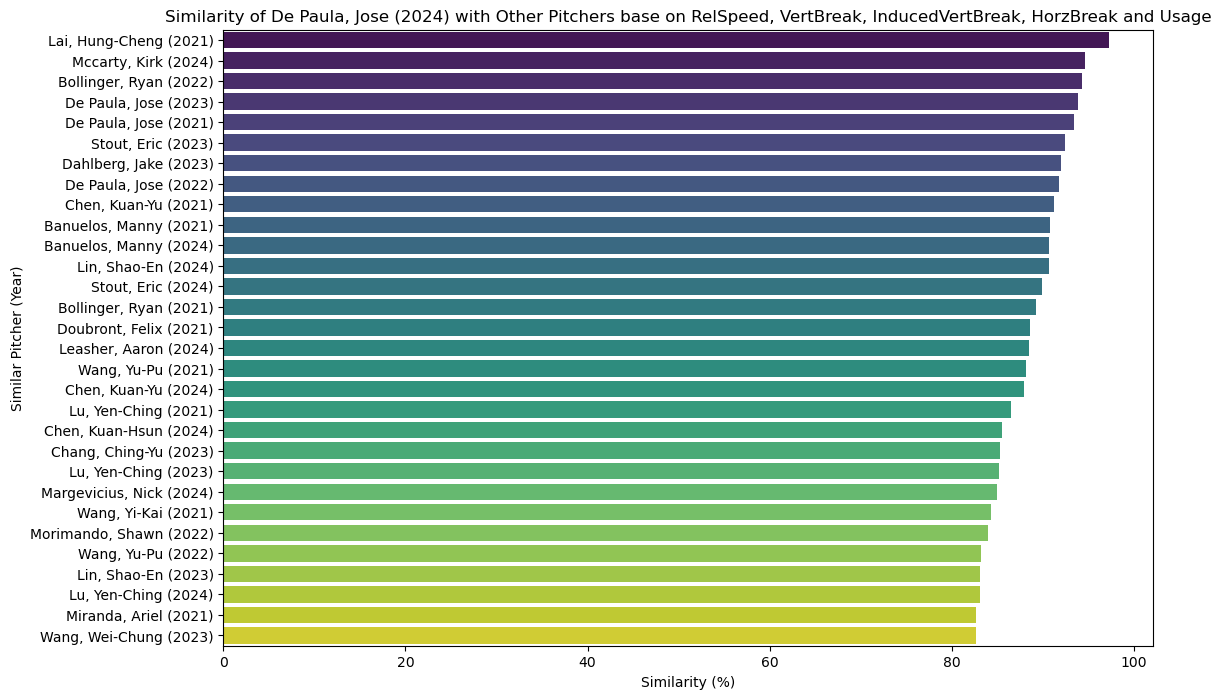

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df['SimilarPitcherWithYear'] = filtered_df['SimilarPitcher'] + ' (' + filtered_df['SimilarPitcherYear'].astype(str) + ')'

plt.figure(figsize=(12, 8))
sns.barplot(x='Similarity(%)', y='SimilarPitcherWithYear', data=filtered_df, palette='viridis')
plt.title(f'Similarity of {pitcher} ({pitcher_year}) with Other Pitchers base on RelSpeed, VertBreak, InducedVertBreak, HorzBreak and Usage')
plt.xlabel('Similarity (%)')
plt.ylabel('Similar Pitcher (Year)')
plt.show()

In [60]:
#top_similar_pitchers_df.to_excel('filtered_df.xlsx', index=True)